**Importando as Bibliotecas**

In [4]:
# Manipulação e cálculos
import pandas as pd #Ler, limpar, transformar tabelas
import numpy as np #Cálculos numéricos rápidos (base para Pandas)

# Visualização estática
import matplotlib.pyplot as plt #Criação de gráficos personalizados
import matplotlib.ticker as mtick #Formatar os valores dos eixos (ex: mostrar milhões, porcentagem, moeda)
import seaborn as sns #Gráficos estatísticos mais bonitos e fáceis

# Visualização interativa
import plotly.express as px #Criar gráficos interativos de forma simples e rápida
import plotly.graph_objects as go #Criar gráficos interativos detalhados, com maior controle sobre cada elemento (barras, linhas, eixos, layouts)

**Configurações do Pandas: Personalizar o comportamento e as configurações de exibição**

In [5]:
pd.set_option('display.max_columns', None) #Exibir todas as colunas do DataFrame
pd.set_option('display.max_rows', None) #Exibir todas as linhas do DataFrame
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') #Formatar números com 2 decimais e separador de milhar

**Carregar Arquivo de Exportação de Vinho**

In [7]:
df_ExportVinhosMesa = pd.read_csv("../Data/Exportacao/Exportacao_VinhosDeMesa.csv", sep=";")

**Visualizar Estrutura da Base**

In [13]:
df_ExportVinhosMesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,463,1673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,0,0,0,0,0,0,0,0,5400,6500,0,0,0,0,0,0,0,0,0,0,67,136,1037,1750,2700,4044,2205,3921,197,510,0,0,3780,7182,2700,5143,0,0,0,0,20700,40590,0,0,43,307,504,700,0,0,9900,15620,1673,11157,1080,4626,0,0,13589,28140,57393,106702,38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3465756,2387643,1682244,1118023,0,0,0,0,0,0,0,0,339,1082,774,1718,1316,3847,18500,12950,168,134,930,1090,125,116,292,332,189,238,0,0,24,46,2118,6401,68494,146017,15780,34732,10998,16738,249717,368817,12150,15529,9812,5290,19937,11437,37573,50382,24056,33039,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,1908,17089,7359,35390,10170,61680,477,709,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,80,324,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Criar uma cópia da tabela original na memória**

In [14]:
#Criar uma cópia para não alterar o dataframe original
df_ExportVinhosMesa02 = df_ExportVinhosMesa.copy()

**Manipulação dos Dados**

1. Renomeação das Colunas de Ano para Quantidade e Valor</br>
**1970.**  - 1970_qtd</br>
**1970.1** - 1970_valor

In [18]:
colunas_novas = {}

for colunas in df_ExportVinhosMesa02.columns:
    
    # Manter Id e País como estão
    if colunas in ["Id", "País"]:
        colunas_novas[colunas] = colunas
        continue
    
    # Caso seja valor (tem .1)
    if ".1" in colunas:
        ano = colunas.replace(".1", "")
        colunas_novas[colunas] = f"{ano}_valor"
    
    # Caso seja litros (não tem .1)
    else:
        colunas_novas[colunas] = f"{colunas}_litros"

# Aplicar mudança nome
df_ExportVinhosMesa02 = df_ExportVinhosMesa02.rename(columns=colunas_novas)

2. **Identificação e Separação das Colunas de Valor e Litros por Ano**  
colunas_litros -> ['1970', '1971', '1972', '1973', ...]  
colunas_valores -> ['1970.1', '1971.1', '1972.1', '1973.1', ...]

In [20]:
#Cria uma lista de colunas que representam litros exportados
coluna_litros = [c for c in df_ExportVinhosMesa02.columns if c.endswith("_litros")]

#Cria uma lista de colunas que representam valores em US$
coluna_valor  = [c for c in df_ExportVinhosMesa02.columns if c.endswith("_valor")]

3. **Transformar o dataframe de “largo” para “longo” (melt)**

In [22]:
#1. Melt geral (transforma tudo em 3 colunas: País, variável e valor)
df_long = df_ExportVinhosMesa02.melt(
    id_vars=["País"],
    var_name="coluna",
    value_name="valor"
)

#2. Separar coluna em: tipo (litros/valor) e ano - Ex.: "1970_litros" → ano = 1970 | tipo = litros
df_long["ano"] = df_long["coluna"].str.extract(r"(\d{4})")
df_long["tipo"] = df_long["coluna"].str.extract(r"(litros|valor)")

#3. Pivotar tipo → duas colunas: litros | valor_usd
df_ExportVinhosMesa02 = df_long.pivot_table(
    index=["País", "ano"],
    columns="tipo",
    values="valor",
    aggfunc="first"
).reset_index()

df_ExportVinhosMesa02.columns.name = None # Remover índice de coluna do pivot

4. **Converter tipos das colunas**

In [28]:
# Converter ano para inteiro
df_ExportVinhosMesa02["ano"] = df_ExportVinhosMesa02["ano"].astype(int)

# Converter litros e valor para float
df_ExportVinhosMesa02["litros"] = df_ExportVinhosMesa02["litros"].astype(float)
df_ExportVinhosMesa02["valor"] = df_ExportVinhosMesa02["valor"].astype(float)

5. **Filtragem dos Últimos 15 Anos (2009–2023)**

In [39]:
# Filtra a base para manter apenas os dados dos últimos 15 anos (2009 em diante)
df_ExportVinhosMesa_Ultimos15Anos = (
    df_ExportVinhosMesa02[df_ExportVinhosMesa02["ano"] >= 2009]
    .reset_index(drop=True)
)

**Construir Nova Tabela**</br>
O Head de dados pediu para construir uma tabela com:</br>
    - País de Origem (Brasil)</br>
    - País de Destino</br>
    - Quantidade em Litros de Vinhos Exportados (1KG = 1L)</br>
    - Valor em US$

In [ ]:
# Criar tabela final
df_ExportVinhosMesa_UltimaVersao = df_ExportVinhosMesa_Ultimos15Anos.copy()

# Adicionar país de origem
df_ExportVinhosMesa_UltimaVersao["País de Origem"] = "Brasil"

# Renomear colunas para ficar mais claro
df_ExportVinhosMesa_UltimaVersao = df_ExportVinhosMesa_UltimaVersao.rename(columns={
    "País": "País de Destino",
    "ano": "Ano",
    "litros": "Litros Exportados",
    "valor": "Valor em US$"
})

# Reorganizar a ordem das colunas
df_ExportVinhosMesa_UltimaVersao = df_ExportVinhosMesa_UltimaVersao[[
    "País de Origem",
    "País de Destino",
    "Ano",
    "Litros Exportados",
    "Valor em US$"
]]

**Análise de Dados**

1. **Consolidado Geral:** Valor Total Litros e US$

In [54]:
total_litros = df_ExportVinhosMesa_UltimaVersao['Litros Exportados'].sum() #Total de litros exportados (15 anos)
total_valor = df_ExportVinhosMesa_UltimaVersao['Valor em US$'].sum() #Total em US$

print(f"Total Litros: {total_litros:,.0f}")
print(f"Total US$: {total_valor:,.2f}")

Total Litros: 83,174,997
Total US$: 114,449,292.00


2. **Evolução Anual (Valor + Volume)**


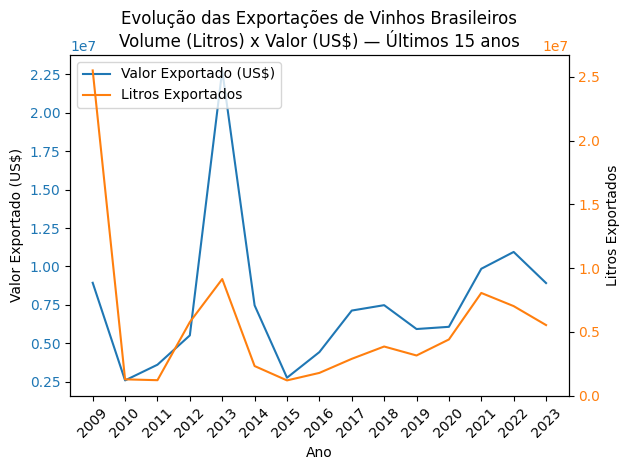

In [61]:
# Agrupamento anual
evolucao_anual = (
    df_ExportVinhosMesa_UltimaVersao
    .groupby('Ano', as_index=False)
    .agg({
        'Litros Exportados': 'sum',
        'Valor em US$': 'sum'
    })
)

# Criação do gráfico
fig, ax1 = plt.subplots()

# Eixo 1 — Valor em US$ (AZUL)
linha_valor = ax1.plot(
    evolucao_anual['Ano'],
    evolucao_anual['Valor em US$'],
    color='tab:blue',
    label='Valor Exportado (US$)'
)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Valor Exportado (US$)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Forçar todos os anos no eixo X
ax1.set_xticks(evolucao_anual['Ano'])
ax1.set_xticklabels(evolucao_anual['Ano'], rotation=45)

# Eixo 2 — Litros Exportados (LARANJA)
ax2 = ax1.twinx()
linha_litros = ax2.plot(
    evolucao_anual['Ano'],
    evolucao_anual['Litros Exportados'],
    color='tab:orange',
    label='Litros Exportados'
)
ax2.set_ylabel('Litros Exportados')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Legenda combinada
linhas = linha_valor + linha_litros
labels = [l.get_label() for l in linhas]
ax1.legend(linhas, labels, loc='upper left')

# Título
plt.title(
    'Evolução das Exportações de Vinhos Brasileiros\n'
    'Volume (Litros) x Valor (US$) — Últimos 15 anos'
)

plt.tight_layout()
plt.show()

A análise da evolução das exportações brasileiras de vinhos ao longo do período de 2009 a 2023 evidencia um comportamento **não linear**, marcado por fases distintas de retração, crescimento e recuperação.

No período entre **2009 e 2011**, observa-se uma **queda significativa** tanto no volume exportado quanto no valor gerado. Esse movimento pode indicar uma **instabilidade inicial do mercado exportador**, possivelmente associada à **dependência de poucos países importadores**, o que torna o desempenho mais sensível a variações externas.

Entre **2012 e 2013**, destaca-se um **pico expressivo no valor exportado**, especialmente em 2013. Embora o volume também apresente crescimento, o aumento do valor ocorre de forma mais acentuada, sugerindo um **aumento no preço médio por litro** ou a ocorrência de **operações pontuais de maior valor agregado**, possivelmente direcionadas a mercados específicos.

O período de **2014 a 2016** é marcado por uma **retração acentuada** tanto em volume quanto em valor. Essa queda pode estar relacionada a fatores externos, como **instabilidade econômica, variações cambiais desfavoráveis e eventos climáticos**, que impactam diretamente a produção e a competitividade do vinho brasileiro no mercado internacional.

A partir de **2017 até 2019**, observa-se uma **recuperação gradual e mais consistente** das exportações. Nesse intervalo, o crescimento ocorre de forma mais equilibrada, indicando uma possível **melhora na organização do mercado exportador** e maior estabilidade nas relações comerciais com os países importadores.

Entre **2020 e 2022**, verifica-se uma **nova aceleração do crescimento**, com destaque para os anos de 2021 e 2022. Nesse período, o aumento do valor exportado acompanha o crescimento do volume, o que caracteriza uma **expansão real do negócio**, sustentada tanto pelo aumento da demanda quanto pela manutenção dos níveis de preço.

Por fim, em **2023**, identifica-se uma **leve retração** em relação aos anos anteriores. Ainda assim, os indicadores permanecem em um **patamar superior ao observado no início da série**, reforçando a percepção de que, apesar das oscilações, o setor apresenta **potencial de crescimento no médio e longo prazo**.